# Zomato Data Analysis

### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load the Dataset into a DataFrame

In [3]:
df= pd.read_csv('Zomato data .csv')

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


#### Checking the descriptive statistics of the DataFrame

In [5]:
df.shape

(148, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


## Data Cleaning and Pre-processing

### Cleaning the rate column

In [7]:
# create a User defined function to remove the </5> from the entries in rate column

def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [8]:
df['rate']=df['rate'].apply(handlerate) #apply the function on the specific column
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# EDA

## Type of Restaurants

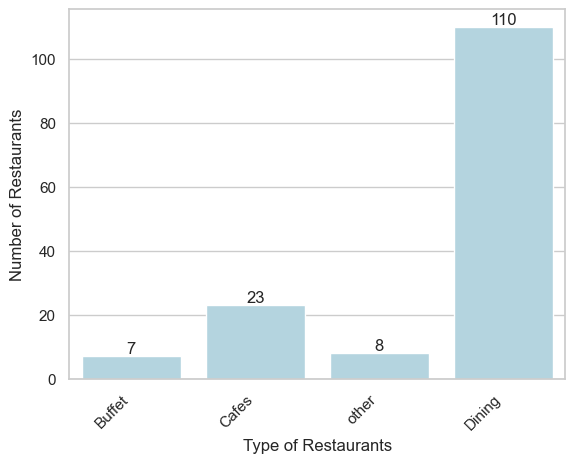

In [9]:
#Set Theme
sns.set_theme(style='whitegrid')

#Plot the data
ax=sns.countplot(x=df['listed_in(type)'], color ='lightblue')

#Add Data labels
for i in ax.containers:
    ax.bar_label(i)


#Set label titles
plt.xlabel('Type of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Restaurants')

plt.show()

### Insight from the plot :


- Most restaurants are dining restaurants and buffets are the least popular category amongst restaurants

# Number of Votes for each restaurant type

In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
#aggregate the total votes by restaurant type
grouped= df.groupby('listed_in(type)')['votes'].sum() 

#create a new DataFrame for store the aggregation
result= pd.DataFrame({'votes':grouped})
result.index.rename('Type of Restaurant', inplace=True)

result

,votes
Type of Restaurant,
Buffet,3028
Cafes,6434
Dining,20363
other,9367


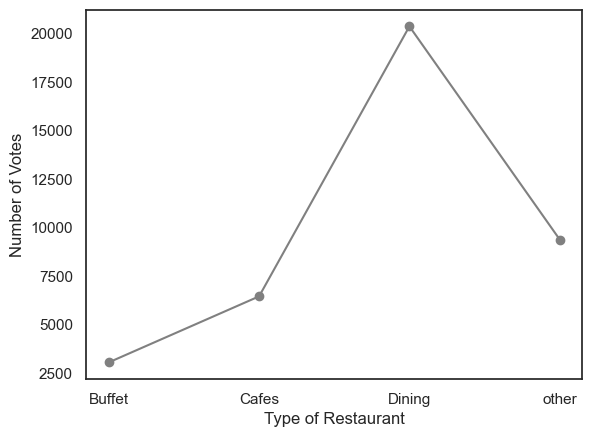

In [14]:
#set a theme
sns.set_theme(style='white')

#plotting the data
ax2=plt.plot(result, marker='o', color='grey')


#Set the axis labels
plt.xlabel("Type of Restaurant")
plt.ylabel("Number of Votes")

#Visualize the plot
plt.show()

### Insight from the plot:


- It is well observed that the most popular category amongst restaurants is 'dining' hence the most votes are also provided to the dining restaurants

## Majority of ratings recieved

In [61]:
df.head() # view the DataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


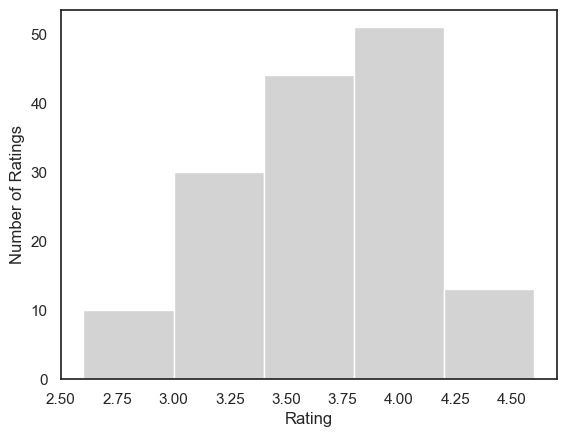

In [15]:
#Plot the Data
plt.hist(df['rate'], color='lightgrey', bins=5)

#Set the axis labels
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')

#Visualise the plot
plt.show()

### Insight from the plot:


- Most of the user ratings fall in between 3.5 - 4 rating points out of 5, which is acceptable but clearly shows a 'middle category bias' which is a very common observation while analysing usr ratings.

## Mean and Mode amount spent by couples

In [74]:
# Visualise the data
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


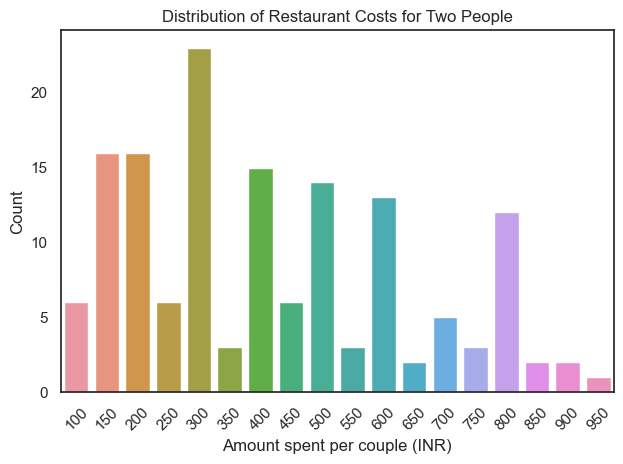

In [19]:
#Plot the Data
sns.countplot(x=df['approx_cost(for two people)'])


# Set axis titles
plt.xlabel('Amount spent per couple (INR)')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Costs for Two People')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Visualize the plot
plt.show()

In [22]:
# Print statistics
mean_cost = df['approx_cost(for two people)'].mean()
print(f"Mean cost: {mean_cost:.2f}")


Mean cost: 418.24


### Insight from the plot:


- Most couples spend INR 300 per order which is the mode amount, which is lower than the Average amount spent by all customers in the database


## DIstribution of ratings by order mode 

In [23]:
df.head() # view the data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


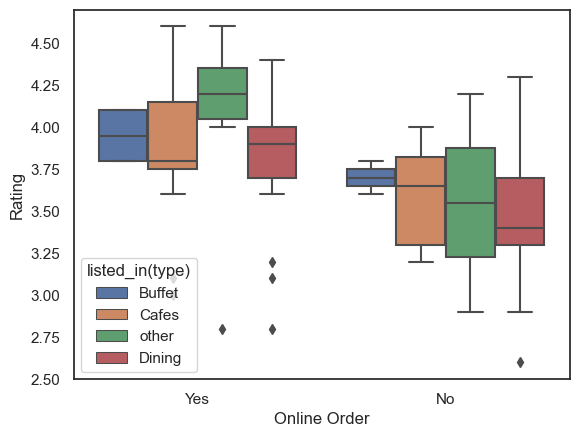

In [33]:
#Plot the Data
sns.boxplot(data=df, x= 'online_order', y='rate', hue = 'listed_in(type)')

# Set the Axis Labels
plt.xlabel('Online Order')
plt.ylabel('Rating')

#Visualise the plot
plt.show()

### Insights from the plot:


- As seen in the plot Online orders tend to get higher ratings as compared to their offline orders
- Restaurants in the 'others' category  generally recieve best ratings amongst online orders.

In [26]:
## Distribution of online orders between different categories of restarants.

In [27]:
df.head() # Visualise the data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [29]:
#Create a pivot table for the heatmap
pivot = df.pivot_table(index='listed_in(type)', columns ='online_order', aggfunc ='size', fill_value= 0)
pivot

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


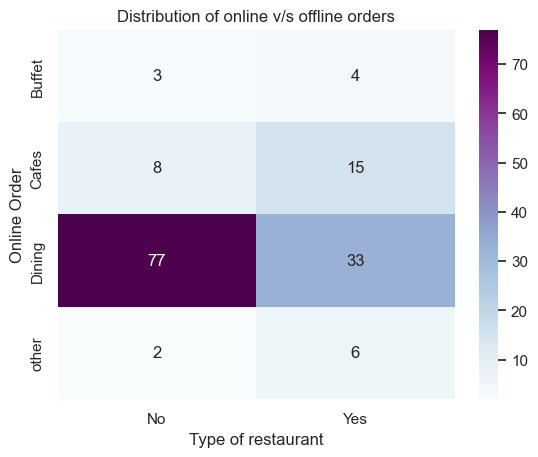

In [30]:
#Plot the heatmap
sns.heatmap(pivot, annot=True,cmap='BuPu')

#Set the title and axis labels
plt.title('Distribution of online v/s offline orders')
plt.xlabel('Type of restaurant')
plt.ylabel('Online Order')

#Visualise the plot
plt.show()

### Insights from the plot:

- Dining restaurants have the highest amount of offline orders, which is obvious because the highest number of restaurants isted are of the dining category
- The distribution amongst online and offline orders seems to be fairly consistent amongst all types of restaurants.
- Zomato should focus on increasing the amount of online orders as well because online ordering recieve higher ratings than offline orders.

In [ ]:


- 